### Regression Project - Regression discontinuity design (RDD)
### Team: Travis, Roosbeh, Marc

Requirements

You need to find data on at least one COVID measure for y (either COVID cases, hospitalizations or deaths) and provide the following for each:

1. A RDD plot similar to the ones shown above

2. An interpretation of the p-value on the effect of the measure taken (the cutoff parameter)

3. A justification on the design of your regression:

    a) The amount of time included on both sides of the cutoff (longer is not necessarily better)
    b) The polynomial degree (higher is not always better)
    c) Other regression design considerations

4. A 2 paragraph explanation of your findings for that event.

In [43]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [44]:
# Load COVID-19 data from Government of Quebec

df = pd.read_csv('./data/COVID19_Qc_Cases.csv')         # COVID-19 cases and deaths

# Keep relevant columns
df = df[['Date', 'Nb_Nvx_Cas']]                         # Use only new COVID-19 cases for this exercise

# Rename column names in English
df.rename(columns={'Nb_Nvx_Cas': 'Nb_case_new'}, inplace=True)

# Convert date column to datetime format
df = df.drop(index=0).reset_index(drop=True)            # Remove corrupt line
df['Date'] = pd.to_datetime(df['Date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         508 non-null    datetime64[ns]
 1   Nb_case_new  508 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 8.1 KB


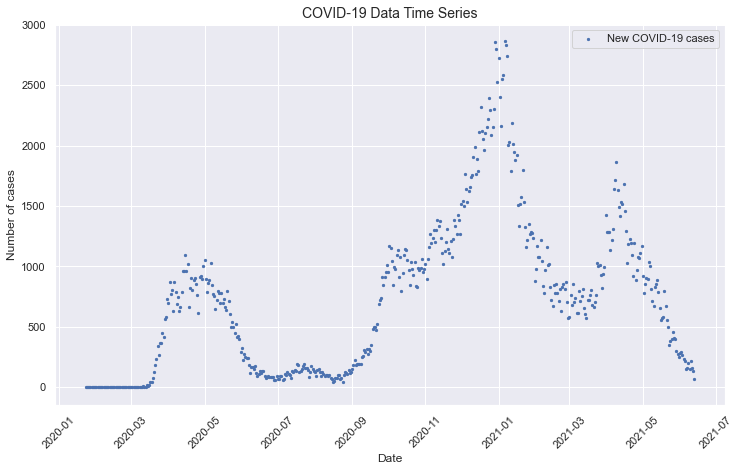

In [45]:
# Plot dataset

sns.set()
fig, ax = plt.subplots(figsize=(12, 7))
plt.scatter(df['Date'], df['Nb_case_new'], label='New COVID-19 cases', s=5)
plt.title('COVID-19 Data Time Series', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Number of cases')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [46]:
# RDD for first event (March 20, 2020 lockdown)

# Event and bandwidth parameters
E = datetime(2020, 3, 20)                   # Event date
h_bf = 21                                   # Bandwidth before event
h_af = 45                                   # Bandwidth after event

# Slice data for the chosen date window
df['Event'] = (df['Date'] - E).dt.days
df_bf = df[(df['Event'] >= -h_bf) & (df['Event'] <= 0)] 
df_af = df[(df['Event'] >= 0) & (df['Event'] <= h_af)]

# Regression before event
X_bf = df_bf['Event']
X_bf = sm.add_constant(X_bf)                # Adding constant
X_bf['Event2'] = X_bf['Event'] ** 2         # Adding 2nd degree polynomial
y_bf = df_bf['Nb_case_new']

model_bf = sm.OLS(y_bf, X_bf)
results_bf = model_bf.fit()
print(results_bf.summary())

# Regression after event
X_af = df_af['Event']
X_af = sm.add_constant(X_af)                # Adding constant
X_af['Event2'] = X_af['Event'] ** 2         # Adding 2nd degree polynomial
y_af = df_af['Nb_case_new']

model_af = sm.OLS(y_af, X_af)
results_af = model_af.fit()
print(results_af.summary())

                            OLS Regression Results                            
Dep. Variable:            Nb_case_new   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     37.82
Date:                Wed, 16 Jun 2021   Prob (F-statistic):           2.37e-07
Time:                        14:50:27   Log-Likelihood:                -88.623
No. Observations:                  22   AIC:                             183.2
Df Residuals:                      19   BIC:                             186.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         84.9466      8.563      9.920      0.0

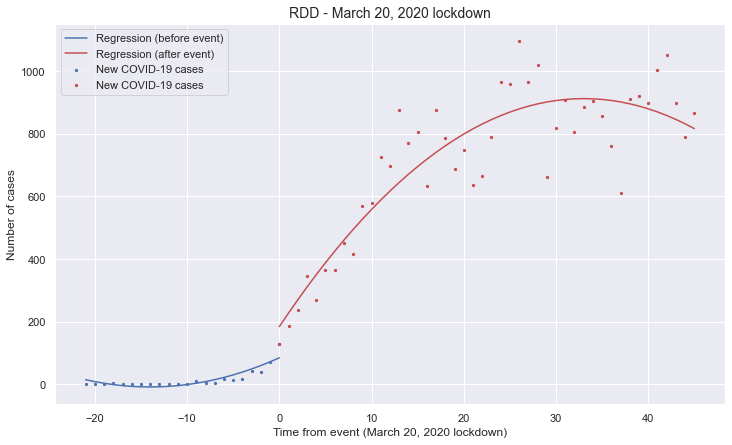

In [47]:
# Plot RDD for first event (March 20, 2020)

# Predict fitted values
y_pred_bf = results_bf.predict(X_bf)
y_pred_af = results_af.predict(X_af)

# Plot graph
sns.set()
fig, ax = plt.subplots(figsize=(12, 7))
plt.scatter(X_bf['Event'], y_bf, label='New COVID-19 cases', s=5, c='b')
plt.scatter(X_af['Event'], y_af, label='New COVID-19 cases', s=5, c='r')
plt.plot(X_bf['Event'], y_pred_bf, label='Regression (before event)', c='b')
plt.plot(X_af['Event'], y_pred_af, label='Regression (after event)', c='r')
plt.title('RDD - March 20, 2020 lockdown', fontsize=14)
plt.xlabel('Time from event (March 20, 2020 lockdown)')
plt.ylabel('Number of cases')
plt.legend()
plt.show()

In [48]:
# RDD for second event (August 31, 2020 schools reopening)

# Event and bandwidth parameters
E = datetime(2020, 8, 31)                   # Event date
h_bf = 30                                   # Bandwidth before event
h_af = 30                                   # Bandwidth after event

# Slice data for the chosen date window
df['Event'] = (df['Date'] - E).dt.days
df_bf = df[(df['Event'] >= -h_bf) & (df['Event'] <= 0)] 
df_af = df[(df['Event'] >= 0) & (df['Event'] <= h_af)]

# Regression before event
X_bf = df_bf['Event']
X_bf = sm.add_constant(X_bf)                # Adding constant
X_bf['Event2'] = X_bf['Event'] ** 2         # Adding 2nd degree polynomial
y_bf = df_bf['Nb_case_new']

model_bf = sm.OLS(y_bf, X_bf)
results_bf = model_bf.fit()
print(results_bf.summary())

# Regression after event
X_af = df_af['Event']
X_af = sm.add_constant(X_af)                # Adding constant
X_af['Event2'] = X_af['Event'] ** 2         # Adding 2nd degree polynomial
y_af = df_af['Nb_case_new']

model_af = sm.OLS(y_af, X_af)
results_af = model_af.fit()
print(results_af.summary())

                            OLS Regression Results                            
Dep. Variable:            Nb_case_new   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     13.55
Date:                Wed, 16 Jun 2021   Prob (F-statistic):           7.65e-05
Time:                        14:50:27   Log-Likelihood:                -136.92
No. Observations:                  31   AIC:                             279.8
Df Residuals:                      28   BIC:                             284.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        132.8152     10.666     12.452      0.0

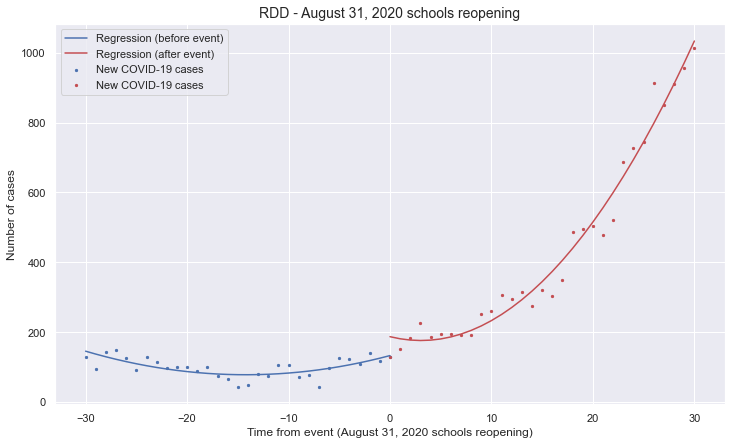

In [49]:
# Plot RDD for second event (August 31, 2020)

# Predict fitted values
y_pred_bf = results_bf.predict(X_bf)
y_pred_af = results_af.predict(X_af)

# Plot graph
sns.set()
fig, ax = plt.subplots(figsize=(12, 7))
plt.scatter(X_bf['Event'], y_bf, label='New COVID-19 cases', s=5, c='b')
plt.scatter(X_af['Event'], y_af, label='New COVID-19 cases', s=5, c='r')
plt.plot(X_bf['Event'], y_pred_bf, label='Regression (before event)', c='b')
plt.plot(X_af['Event'], y_pred_af, label='Regression (after event)', c='r')
plt.title('RDD - August 31, 2020 schools reopening', fontsize=14)
plt.xlabel('Time from event (August 31, 2020 schools reopening)')
plt.ylabel('Number of cases')
plt.legend()
plt.show()

In [50]:
# RDD for third event (December 25, 2020 lockdown)

# Event and bandwidth parameters
E = datetime(2020, 12, 25)                   # Event date
h_bf = 30                                   # Bandwidth before event
h_af = 30                                   # Bandwidth after event

# Slice data for the chosen date window
df['Event'] = (df['Date'] - E).dt.days
df_bf = df[(df['Event'] >= -h_bf) & (df['Event'] <= 0)] 
df_af = df[(df['Event'] >= 0) & (df['Event'] <= h_af)]

# Regression before event
X_bf = df_bf['Event']
X_bf = sm.add_constant(X_bf)                # Adding constant
X_bf['Event2'] = X_bf['Event'] ** 2         # Adding 2nd degree polynomial
y_bf = df_bf['Nb_case_new']

model_bf = sm.OLS(y_bf, X_bf)
results_bf = model_bf.fit()
print(results_bf.summary())

# Regression after event
X_af = df_af['Event']
X_af = sm.add_constant(X_af)                # Adding constant
X_af['Event2'] = X_af['Event'] ** 2         # Adding 2nd degree polynomial
y_af = df_af['Nb_case_new']

model_af = sm.OLS(y_af, X_af)
results_af = model_af.fit()
print(results_af.summary())

                            OLS Regression Results                            
Dep. Variable:            Nb_case_new   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     120.9
Date:                Wed, 16 Jun 2021   Prob (F-statistic):           1.68e-14
Time:                        14:50:27   Log-Likelihood:                -188.12
No. Observations:                  31   AIC:                             382.2
Df Residuals:                      28   BIC:                             386.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2317.7830     55.631     41.664      0.0

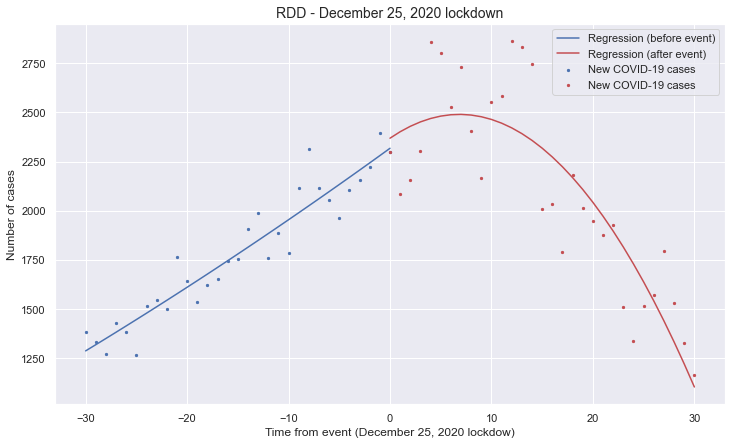

In [51]:
# Plot RDD for third event (December 25, 2020)

# Predict fitted values
y_pred_bf = results_bf.predict(X_bf)
y_pred_af = results_af.predict(X_af)

# Plot graph
sns.set()
fig, ax = plt.subplots(figsize=(12, 7))
plt.scatter(X_bf['Event'], y_bf, label='New COVID-19 cases', s=5, c='b')
plt.scatter(X_af['Event'], y_af, label='New COVID-19 cases', s=5, c='r')
plt.plot(X_bf['Event'], y_pred_bf, label='Regression (before event)', c='b')
plt.plot(X_af['Event'], y_pred_af, label='Regression (after event)', c='r')
plt.title('RDD - December 25, 2020 lockdown', fontsize=14)
plt.xlabel('Time from event (December 25, 2020 lockdow)')
plt.ylabel('Number of cases')
plt.legend()
plt.show()

Event #1 - March 20, 2020 lockdown
 
For our first lockdown model, we chose to investigate the effect the lockdown had on the number of new cases and the impact on incoming virus cases. Therefore, we utilized 21 days before the lockdown and 45 days after the lockdown for our dataset of our model. With our chosen investigation days, we achieved extremely low p-values, which tells us that our model rejects the null hypothesis (i.e. the model is statistically significant). Our R squared values gave our model an 80%(rounded up) efficiency rate and accuracy. From our visualized data of the lockdown, we can surmise that the lockdown had little to no effect on the number of incoming cases in Quebec. However, due to the lack of COVID-19 testing, the case numbers were deficient before the lockdown, and a full accounting of virus cases before the lockdown would allow for a more in-depth investigation and a more accurate model. Thus our model shows no effective change and looks to have caused rapid expanse in the number of new cases.

Event #2 - August 31, 2020 schools reopening

The regression summary of the second event clearly shows that the p-value is less than 0.05, meaning that there was a statistical difference and the reopening of the schools caused the number of cases to increase.  A 30-day period was included for both Pre and Post cutoff. Right after reopening the schools, the number of cases rose to the extent that within a month, it became five-folds, reaching 1,000 cases. A polynomial degree above 2 would start generating over-fitting issues, beginning to describe the random error in the data rather than the relationships between variables.

Event #3 - December 25, 2020 lockdown

We continued to use 2nd-degree polynomial regressions on both sides of the cutoff date (i.e. Dec. 25, 2020). Over the 30-day bandwidth (which we believe balances between precision and bias), the 2nd polynomial regression provides the best fit while avoiding over-fitting (R squared values of 0.896 for the 30-day Pre cutoff period and 0.733 for the 30-day Post cutoff period). In both cases, the p-values of the constant term, which is the intercept at the cutoff point, are below 0.05 or statistically significant. Graphically, we can observe a steady linear increase in new COVID-19 cases during the period before Xmas and a sharp reversal of that trend following the lockdown.